In [1]:
import numpy as np
from scipy import stats, integrate
#import statistics
import matplotlib.pyplot as plt
import math
import pandas as pd

### Читаем исходные данные

In [3]:
data = pd.read_excel(
    open('Samples_3.xls', 'rb'), 
    sheet_name='Вар13'
)

len(data)

100

In [4]:
x1 = data['X1'].tolist()
x2 = data['X2'].tolist()
x3 = data['X3'].tolist()
x4 = data['X4'].tolist()
y = data['Y'].tolist()

len(x1), len(y)

(100, 100)

#### Создаем единичный столбец

In [5]:
single_column = [1 for _ in x1]
len(single_column)

100

#### Собираем X

In [6]:
x = [col for col in [single_column, x1, x2, x3, x4]]
len(x)

5

#### Транспонируем матрицу X

In [7]:
x_t =  [[1] + [x[j][i] for j in range(1, 5)] for i in range(len(x1))]
x_t[0]

[1,
 -0.19377418959972506,
 5.190645644702547,
 0.18544412111456654,
 -0.5261514690108339]

##### Умножаем X (транспонированная) и X

In [8]:
matrix_xt_x = [[0 for _ in x] for _ in x_t[0]]

for i in range(len(x)):
   for j in range(len(x_t[0])):
       for k in range(len(x_t)):
           matrix_xt_x[i][j] += x_t[k][i] * x[j][k]

#### Умножаем X (транспонированная) и Y

In [9]:
matrix_xt_y = [0 for _ in x_t[0]]

for j in range(len(x_t[0])):
    for k in range(len(x_t)):
        matrix_xt_y[j] += x_t[k][j] * y[k]

matrix_xt_y

[338.6300058749858,
 42.252055355734775,
 1723.392457344001,
 23.78018851568639,
 2.064313847372967]

#### Собираем (XT * X)^-1

In [10]:
matrix_xt_x_inv = np.linalg.inv(matrix_xt_x)

#### Собираем вектор оценок коэффициентов регрессии

In [11]:
koef_vector = [0 for _ in x_t[0]]

for j in range(len(matrix_xt_x_inv[0])):
    for k in range(len(matrix_xt_x_inv)):
        koef_vector[j] += matrix_xt_x_inv[k][j] * matrix_xt_y[k]

koef_vector

[-2.621630746298089,
 1.2374663938798127,
 1.1726284887264709,
 3.5100588055156474,
 0.33665183117660347]

#### Получаем уравнение регрессии

In [12]:
regression_equation = (
    f'Y = {koef_vector[0]:.3f}'
    + f' + {koef_vector[1]:.3f}*X1'
    + f' + {koef_vector[2]:.3f}*X2'
    + f' + {koef_vector[3]:.3f}*X3'
    + f' + {koef_vector[4]:.3f}*X4'
)

regression_equation

'Y = -2.622 + 1.237*X1 + 1.173*X2 + 3.510*X3 + 0.337*X4'

#### Считаем параметры

In [13]:
x = [col for col in [single_column, y, x1, x2, x3, x4]]
x_t =  [[1] + [x[j][i] for j in range(1, 6)] for i in range(len(x1))]

matrix = [[0 for _ in x] for _ in x_t[0]]
    

for i in range(len(x)):
    for j in range(len(x_t[0])):
        for k in range(len(x_t)):
           matrix[i][j] += x_t[k][i] * x[j][k]
        matrix[i][j] /= len(x1)

#### Дисперсия ошибки

In [14]:
d_error = 0
for i in y:
    d_error += (i - matrix[0][1]) * (i - matrix[0][1])
    
d_error

435.26453895372725

#### Частные коэффициенты корреляции

In [15]:
def calc(col, value):
    return math.sqrt(sum([(i - value)*(i - value) for i in col]) / len(col))

In [16]:
x_y = []
xs = [x1, x2, x3, x4]
for i in range(1, 5):
    value = (matrix[1][i+1] - matrix[0][i + 1] * matrix[0][1]) / (calc(y, matrix[0][1]) * calc(xs[i - 1], matrix[0][i + 1]))
    x_y.append(f'X{i} и Y: {value}')

x_y

['X1 и Y: 0.32024294355336624',
 'X2 и Y: 0.2338840077292642',
 'X3 и Y: 0.3614789828777408',
 'X4 и Y: 0.12716867476892077']

#### Множественный коэффициент корреляции

In [17]:
b = koef_vector
r_values = []
y_on_x = []
for i in range(0, len(y)):
    value = x1[i] * b[1] + x2[i] * b[2] + x3[i] * b[3] + x4[i] * b[4] + b[0]
    y_on_x.append(value)
    r_values.append(y[i] - value)

val = 0
val += sum([i*i for i in r_values])

r = math.sqrt(1 - val/d_error)
print(r)


0.5313376701381748


#### Коэффициент детерминации

In [18]:
det = 1 - (1 - r * r) * ((len(y) - 1) / (len(y) - 4 - 1))
det

0.2521016026429319

#### Проверка на значимость функции регрессии

In [19]:
f = (r * r) / (1 - (r * r)) * (len(y) - 4 - 1) / (len(y) - 1)
f

0.37748405492715115

In [20]:
dof = len(x1) - 4 - 1
f_kr = stats.t.ppf(1-0.1, dof)

print('h0 - не отвергаем') if f > f_kr else print('h0 - отвергаем')

h0 - отвергаем


#### Гистограмма остатков

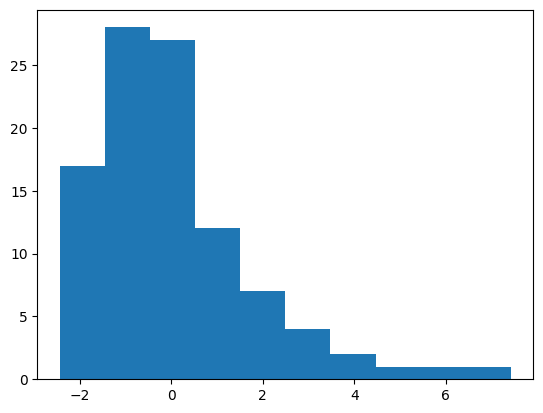

In [21]:
plt.hist(r_values)
plt.show()

#### График зависимости наблюдаемого и предсказываемого значения

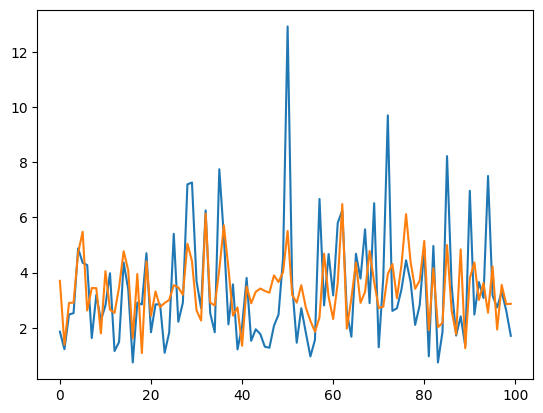

In [22]:
plt.plot(y)
plt.plot(y_on_x)
plt.show()